<a href="https://colab.research.google.com/github/05072007/car-price-prediction-ml-project/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Unemployment analysis with python
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Dataset
df = pd.read_csv("sample_data/Unemployment in India.csv")

In [4]:
# Dataset Understanding
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN

In [6]:
# Data Cleaning
df.columns = df.columns.str.strip()
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
# Renaming Columns
df.rename(columns={
    "Region": "State",
    "Estimated Unemployment Rate (%)": "Unemployment_Rate",
    "Estimated Employed": "Employed",
    "Estimated Labour Participation Rate (%)": "Labour_Rate"
}, inplace=True)

In [8]:
# Describing Statistics
df.describe()

,Unemployment_Rate,Employed,Labour_Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


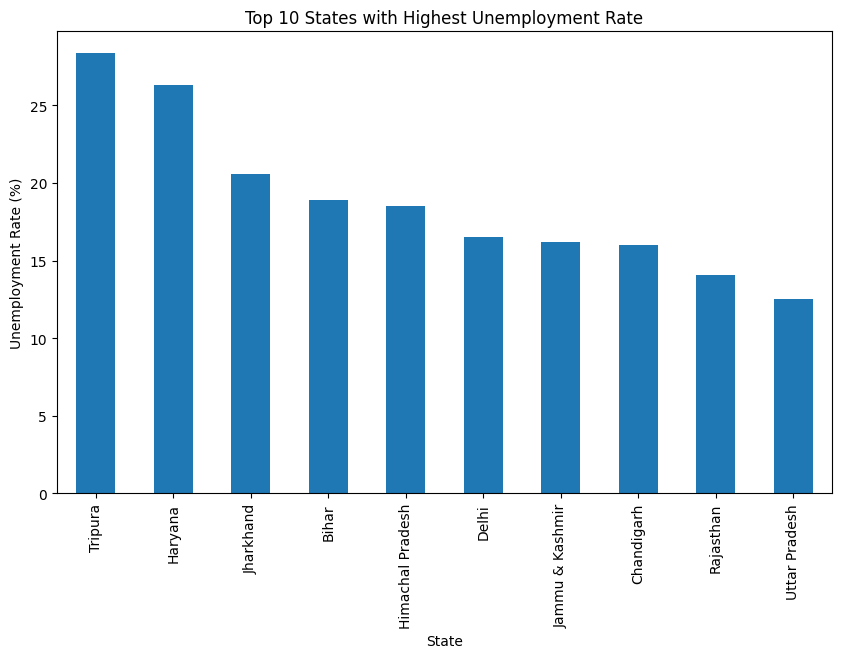

In [9]:
# Unemployment Rate by State
state_avg = df.groupby("State")["Unemployment_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
state_avg.head(10).plot(kind="bar")
plt.title("Top 10 States with Highest Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()

/tmp/ipython-input-1986985727.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


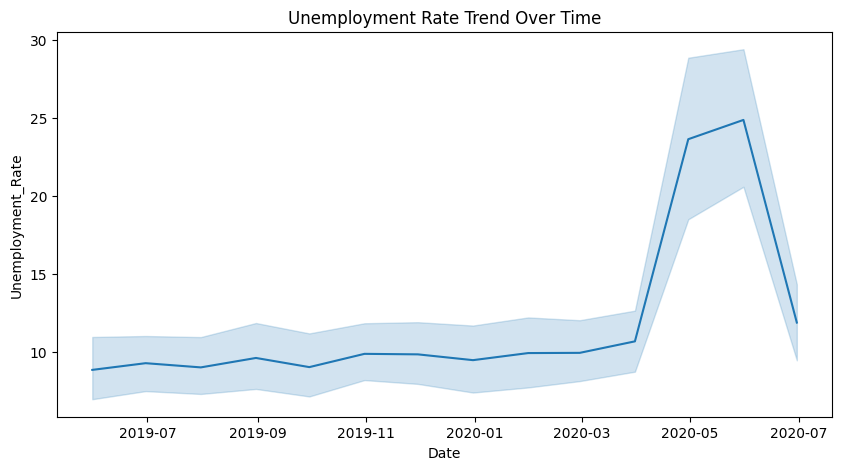

In [14]:
# Unemployment Over Time
plt.figure(figsize=(10,5))
df["Date"] = pd.to_datetime(df["Date"])
sns.lineplot(x="Date", y="Unemployment_Rate", data=df)
plt.title("Unemployment Rate Trend Over Time")
plt.show()

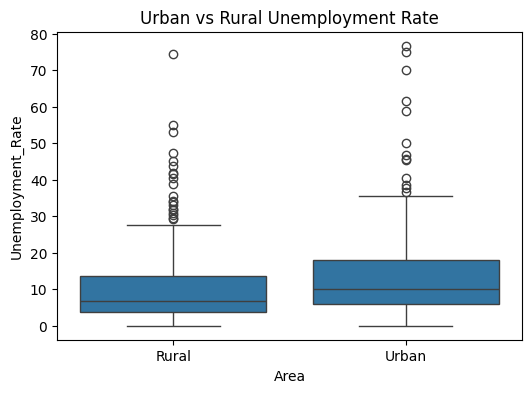

In [15]:
# Urban vs Rural Analysis
plt.figure(figsize=(6,4))
sns.boxplot(x="Area", y="Unemployment_Rate", data=df)
plt.title("Urban vs Rural Unemployment Rate")
plt.show()

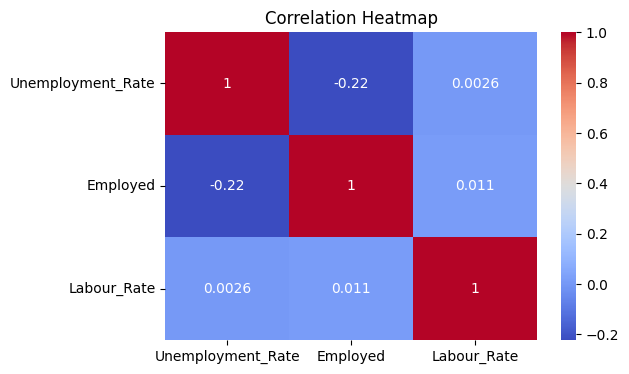

In [16]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Unemployment_Rate", "Employed", "Labour_Rate"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Final Conclusion
print("Conclusion:")
print("• Unemployment varies significantly across states.")
print("• Certain states show consistently higher unemployment.")
print("• Urban and rural unemployment rates differ.")
print("• Data analysis helps understand economic impact.")

Conclusion:
• Unemployment varies significantly across states.
• Certain states show consistently higher unemployment.
• Urban and rural unemployment rates differ.
• Data analysis helps understand economic impact.
